# 1.3



In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
housing_df = pd.read_csv('housing.csv')
housing_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


Проведите преобразование категориального признака ocean_proximity через OneHot или Dummy-кодировку

In [4]:
DUMMY_SEP = '__'

Делее работаю только с тренировочной выборкой

In [5]:
housing_dummies = pd.get_dummies(housing_df,columns = ['ocean_proximity'], prefix_sep=DUMMY_SEP)
housing_dummies

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity__<1H OCEAN,ocean_proximity__INLAND,ocean_proximity__ISLAND,ocean_proximity__NEAR BAY,ocean_proximity__NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0


Замените признаки total_rooms и total_bedrooms на average_rooms и average_bedrooms (поделив на households).


In [6]:
housing_dummies['average_rooms'] = housing_dummies['total_rooms']/housing_dummies['households']
housing_dummies['average_bedrooms'] = housing_dummies['total_bedrooms']/housing_dummies['households']
housing_dummies = housing_dummies.drop(['total_rooms','total_bedrooms'], axis=1)
housing_dummies

,longitude,latitude,housing_median_age,population,households,median_income,median_house_value,ocean_proximity__<1H OCEAN,ocean_proximity__INLAND,ocean_proximity__ISLAND,ocean_proximity__NEAR BAY,ocean_proximity__NEAR OCEAN,average_rooms,average_bedrooms
0,-122.23,37.88,41.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0,6.984127,1.023810
1,-122.22,37.86,21.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0,6.238137,0.971880
2,-122.24,37.85,52.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0,8.288136,1.073446
3,-122.25,37.85,52.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0,5.817352,1.073059
4,-122.25,37.85,52.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0,6.281853,1.081081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0,5.045455,1.133333
20636,-121.21,39.49,18.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0,6.114035,1.315789
20637,-121.22,39.43,17.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0,5.205543,1.120092
20638,-121.32,39.43,18.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0,5.329513,1.171920


In [7]:
sum(housing_dummies['average_bedrooms'].isnull())

207

В признаке average_bedrooms (total_bedrooms) есть отсутствующие значения. Определите число экземпляров данных, для которых этот признак отсутствует. Придумайте и обоснуйте стратегию заполнения пропусков в этой задаче. 

Изначально я хотел найти минимум и максимум в каждом столбце, затем найти запись, в которой среднее отклонение в процентах от записи, которую надо дополнить, минимальное, после чего перенести недостоющее значение из этой максимально похожей записи. 

Но в таком подходе есть существенный недостаток - если на average_bedrooms большое влияние оказывает какое-то одно поле, то значения могут сильно отклоняться. 

Поэтому я решил попробовать обучить какую-нибудь модель  

In [8]:
housing_dummies_dna = housing_dummies.dropna(axis=0)
housing_dummies_dna

,longitude,latitude,housing_median_age,population,households,median_income,median_house_value,ocean_proximity__<1H OCEAN,ocean_proximity__INLAND,ocean_proximity__ISLAND,ocean_proximity__NEAR BAY,ocean_proximity__NEAR OCEAN,average_rooms,average_bedrooms
0,-122.23,37.88,41.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0,6.984127,1.023810
1,-122.22,37.86,21.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0,6.238137,0.971880
2,-122.24,37.85,52.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0,8.288136,1.073446
3,-122.25,37.85,52.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0,5.817352,1.073059
4,-122.25,37.85,52.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0,6.281853,1.081081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0,5.045455,1.133333
20636,-121.21,39.49,18.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0,6.114035,1.315789
20637,-121.22,39.43,17.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0,5.205543,1.120092
20638,-121.32,39.43,18.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0,5.329513,1.171920


In [9]:
housing_dummies_dna = housing_dummies.dropna(axis=0).drop('median_house_value',axis=1)

In [10]:
housing_train_dummies_dna, housing_test_dummies_dna =  train_test_split( housing_dummies_dna, test_size = 0.1)

x_train = housing_train_dummies_dna.drop('average_bedrooms',axis=1)
y_train = housing_train_dummies_dna['average_bedrooms']

x_test = housing_test_dummies_dna.drop('average_bedrooms',axis=1)
y_test =housing_test_dummies_dna['average_bedrooms']

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [12]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
r2_score(y_train, lin_reg.predict(x_train))

0.868889513689743

In [13]:
mean_squared_error(y_train, lin_reg.predict(x_train))

0.031059560969414472

In [14]:
mean_squared_error(y_test, lin_reg.predict(x_test))

0.026086603043200526

In [15]:
mean_squared_error(y_test, np.linspace(np.mean(y_train),np.mean(y_train), len(y_test)))

0.13461704856247533

In [16]:
import matplotlib.pyplot as plt
import numpy as np

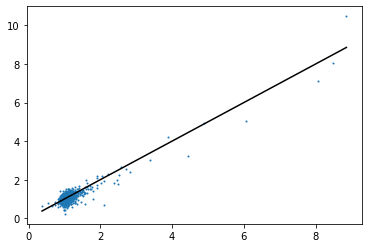

In [17]:
plt.scatter(y_test, lin_reg.predict(x_test), s = 1)
x = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x, x, c ='black')

Мда, ну это по любому из-за шума, сейчас всё почищу 

<AxesSubplot:>

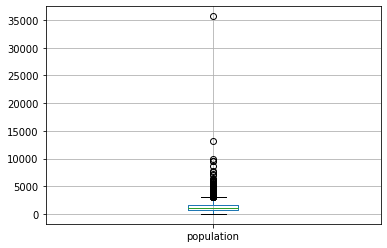

In [18]:
housing_test_dummies_dna.boxplot(column=['population'])

<AxesSubplot:>

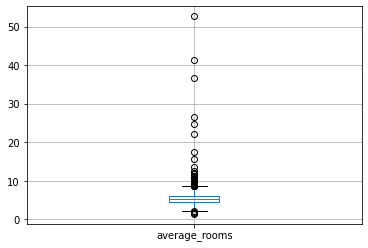

In [19]:
housing_test_dummies_dna.boxplot(column=['average_rooms'])

<AxesSubplot:>

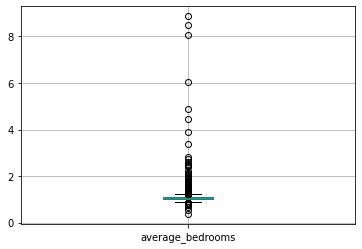

In [20]:
housing_test_dummies_dna.boxplot(column=['average_bedrooms'])

Теперь с отчищенными

In [21]:
def prepare_to_lin_reg(x):
    x = x.dropna(axis=0).drop('median_house_value',axis=1)
    x = x.loc[housing_dummies_dna['population'] < 4000]
    x = x.loc[housing_dummies_dna['average_rooms'] < 10]
    x = x.loc[housing_dummies_dna['average_bedrooms'] < 2]
    return x

In [22]:
housing_dummies_dna = housing_dummies.dropna(axis=0).drop('median_house_value',axis=1)



housing_train_val, housing_test =  train_test_split( housing_dummies, test_size =0.1)
housing_train, housing_val =  train_test_split( housing_train_val, test_size =0.1)

x_train = prepare_to_lin_reg(housing_train).drop('average_bedrooms',axis=1)
y_train = prepare_to_lin_reg(housing_train)['average_bedrooms']

x_test = prepare_to_lin_reg(housing_test).drop('average_bedrooms',axis=1)
y_test = prepare_to_lin_reg(housing_test)['average_bedrooms']

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
mean_squared_error(y_train, lin_reg.predict(x_train))

0.008985813013221128

Сравним со средней ошибкой просто среднего значения без вбросов по столбцу в тренеровочной выборке

In [23]:
mean_squared_error(y_test, lin_reg.predict(x_test))

0.008656081157749154

In [24]:
mean_squared_error(y_test, np.linspace(np.mean(y_train),np.mean(y_train), len(y_test)))

0.011085971106711506

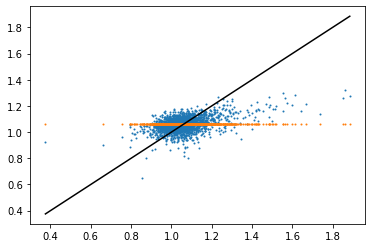

In [25]:
plt.scatter(y_test, lin_reg.predict(x_test), s = 1)
plt.scatter(y_test, np.linspace(np.mean(y_train),np.mean(y_train), len(y_test)), s = 1)
x = np.linspace(min(y_test), max(y_test), 2)
plt.plot(x, x, c ='black')

Итоговая прибавка к точности выглядит жалко ![jupyter](https://pbs.twimg.com/media/EB2KuSzXoAAEHBW.jpg:small)

Нормализуйте признаки longitude и latitude (сделайте так, чтобы каждый признак имел среднее значение 0 и дисперсию 1 внутри обучающей выборки)

In [26]:
housing_train_null = housing_train['average_bedrooms'].isnull()
housing_test_null = housing_test['average_bedrooms'].isnull()
housing_val_null = housing_val['average_bedrooms'].isnull()

In [27]:
x_train = housing_train.loc[housing_train_null].drop('average_bedrooms',axis=1).drop('median_house_value',axis=1)
x_test = housing_test.loc[housing_test_null].drop('average_bedrooms',axis=1).drop('median_house_value',axis=1)
x_val = housing_val.loc[housing_val_null].drop('average_bedrooms',axis=1).drop('median_house_value',axis=1)

In [28]:
housing_train.loc[housing_train_null, 'average_bedrooms' ] = lin_reg.predict(x_train)
housing_test.loc[housing_test_null, 'average_bedrooms' ] = lin_reg.predict(x_test)
housing_val.loc[housing_val_null, 'average_bedrooms' ] = lin_reg.predict(x_val)

In [29]:
sum(housing_train['average_bedrooms'].isnull())

0

In [30]:
from sklearn import preprocessing

In [31]:
scaler_longitude = preprocessing.StandardScaler().fit(housing_train[['longitude']])
scaler_latitude = preprocessing.StandardScaler().fit(housing_train[['latitude']])


In [32]:
housing_train['longitude'] = scaler_longitude.transform(housing_train[['longitude']]).reshape(-1)
housing_train['latitude'] = scaler_latitude.transform(housing_train[['latitude']]).reshape(-1)

housing_test['longitude'] = scaler_longitude.transform(housing_test[['longitude']]).reshape(-1)
housing_test['latitude'] = scaler_latitude.transform(housing_test[['latitude']]).reshape(-1)

housing_val['longitude'] = scaler_longitude.transform(housing_val[['longitude']]).reshape(-1)
housing_val['latitude'] = scaler_latitude.transform(housing_val[['latitude']]).reshape(-1)

print(housing_train['longitude'].to_numpy().mean(axis = 0))
print(housing_train['longitude'].to_numpy().std(axis = 0))

print(housing_test['longitude'].to_numpy().mean(axis = 0))
print(housing_test['longitude'].to_numpy().std(axis = 0))

-5.792976126576245e-16
0.9999999999999999
-0.01019387093043665
0.9942589374918449


2.2

 Возьмите данные с листа 1 и выделите валидационную и тестовую выборку.

In [33]:
ccpp_df = pd.read_excel('CCPP.xlsx')

In [34]:
ccpp_df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [35]:
import sklearn as sk

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
ccpp_train_val, ccpp_test = train_test_split(ccpp_df, test_size=0.1)
ccpp_train, ccpp_val = train_test_split(ccpp_train_val, test_size=0.1)

Постройте регрессионную модель.  Замерьте коэффициент  и среднюю ошибку предсказания на валидационной выборке.


In [39]:
reg = LinearRegression()

In [40]:
X_train, y_train = ccpp_train.drop("PE",axis=1), ccpp_train['PE']

In [41]:
reg.fit(X_train, y_train)

LinearRegression()

In [42]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [43]:
predictions = reg.predict(ccpp_val.drop("PE",axis=1))


Нахождение $R^2$

In [44]:
r2 = r2_score(ccpp_val['PE'], predictions)
r2

0.9177604593589977

Нахождение средней ошибки предсказаний

In [45]:
mae = mean_absolute_error(ccpp_val['PE'], predictions)
mae

3.543740887070773

Постройте точки из валидационной выборки на плоскости (t=истинное значение, y=предсказание модели). Отобразите вместе с ними прямую y=t. 


In [46]:
import matplotlib.pyplot as plt
import numpy as np

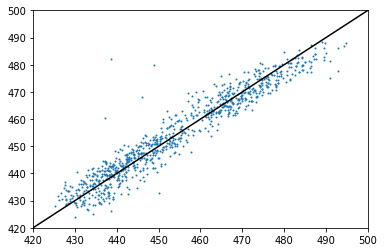

In [47]:
ax = plt.gca()
ax.cla()
ax.set_xlim((420, 500))
ax.set_ylim((420, 500))

plt.scatter(ccpp_val['PE'], predictions, s = 1)
plt.plot(np.linspace(420,500),np.linspace(420,500), c = 'black')

2.1

In [48]:
davis_df = pd.read_csv('Davis.csv')
davis_df

,Unnamed: 0,sex,weight,height,repwt,repht
0,1,M,77,182,77.0,180.0
1,2,F,58,161,51.0,159.0
2,3,F,53,161,54.0,158.0
3,4,M,68,177,70.0,175.0
4,5,F,59,157,59.0,155.0
...,...,...,...,...,...,...
195,196,M,74,175,71.0,175.0
196,197,M,83,180,80.0,180.0
197,198,M,81,175,NaN,NaN
198,199,M,90,181,91.0,178.0


 Удалите некорректные данные


In [49]:
davis_df = davis_df.drop('Unnamed: 0', axis=1)
davis_df = davis_df.loc[davis_df['weight'] > 40]
davis_df = davis_df.loc[davis_df['height'] > 120]
davis_df

,sex,weight,height,repwt,repht
0,M,77,182,77.0,180.0
1,F,58,161,51.0,159.0
2,F,53,161,54.0,158.0
3,M,68,177,70.0,175.0
4,F,59,157,59.0,155.0
...,...,...,...,...,...
195,M,74,175,71.0,175.0
196,M,83,180,80.0,180.0
197,M,81,175,NaN,NaN
198,M,90,181,91.0,178.0


Выделите тестовую выборку из 50 экземпляров

In [50]:
davis_train, davis_test = train_test_split(davis_df, test_size = 50, stratify=davis_df['sex'])

Гистограммa weight


<AxesSubplot:xlabel='weight', ylabel='Count'>

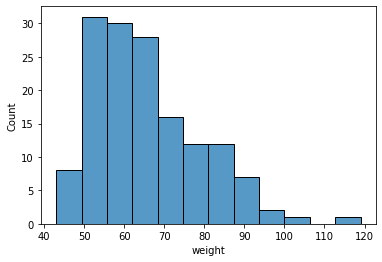

In [51]:
import seaborn as sns
sns.histplot(davis_train['weight'])


Гистограммa height

<AxesSubplot:xlabel='height', ylabel='Count'>

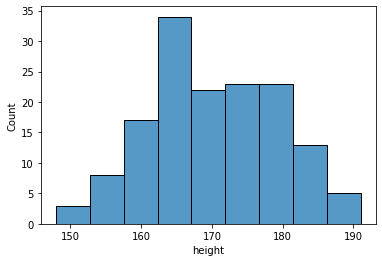

In [52]:
sns.histplot(davis_train['height'])

Эти же гистограммы для разных полов

<AxesSubplot:xlabel='weight', ylabel='Count'>

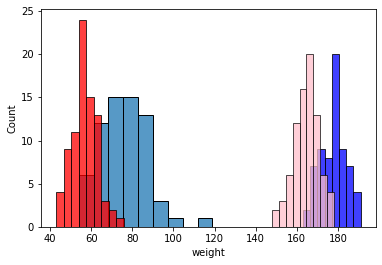

In [53]:
sns.histplot(davis_train[davis_train['sex'] =='M']['weight'])
sns.histplot(davis_train[davis_train['sex'] =='M']['height'], color='blue')

sns.histplot(davis_train[davis_train['sex'] =='F']['weight'], color='red')
sns.histplot(davis_train[davis_train['sex'] =='F']['height'], color='pink')


 На тренировочных данных обучите классификатор пола (sex), используя только признаки height и weight.

In [54]:
davis_train.replace({'M': 1, 'F': 0}, inplace=True)
davis_test.replace({'M': 1, 'F': 0}, inplace=True)
davis_train

,sex,weight,height,repwt,repht
156,1,69,172,68.0,174.0
147,0,59,157,55.0,158.0
136,0,64,172,62.0,168.0
182,1,82,181,NaN,NaN
164,1,56,163,58.0,161.0
...,...,...,...,...,...
38,1,88,178,86.0,175.0
75,0,50,171,NaN,NaN
122,0,68,178,68.0,175.0
24,0,54,171,59.0,168.0


In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [56]:
log_reg = LogisticRegression()
qdanalysis = QuadraticDiscriminantAnalysis()
x_train, y_train = davis_train[['height','weight']], davis_train['sex']
log_reg.fit(x_train,y_train)
qdanalysis.fit(x_train,y_train)

QuadraticDiscriminantAnalysis()

In [57]:
from sklearn.metrics import accuracy_score

In [58]:
x_test, y_test = davis_test[['height','weight']], davis_test['sex']

Замерьте производительность на тренировочной и тестовой выборке (через Accuracy).

In [59]:
log_predicts_test = log_reg.predict(x_test)
qda_predicts_test = qdanalysis.predict(x_test)

In [60]:
log_reg_acc = accuracy_score(log_predicts_test, y_test)
log_reg_acc

0.92

In [61]:
log_reg_qda = accuracy_score(qda_predicts_test, y_test)
log_reg_qda

0.88

In [62]:
log_predicts_train = log_reg.predict(x_train)
qda_predicts_train = qdanalysis.predict(x_train)

Отобразите точки из обучающей выборки на плоскости (height-weight). Покрасьте их цветами в зависимости от пола. Раскрасьте области в зависимости от пола, предсказанного обученным в п.4. классификатором.

In [63]:
x1_min, x1_max = x_train['weight'].min()-0.5, x_train['weight'].max()+0.5
x2_min, x2_max = x_train['height'].min()-0.5, x_train['height'].max()+0.5


In [64]:
xx1,xx2 = np.mgrid[x1_min:x1_max:50j, x2_min:x2_max:50j]

In [65]:
X_pred = np.column_stack([xx2.reshape(-1),xx1.reshape(-1) ])

In [66]:
y_pred = log_reg.predict(X_pred)

C:\ProgramData\Anaconda3\envs\ML\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


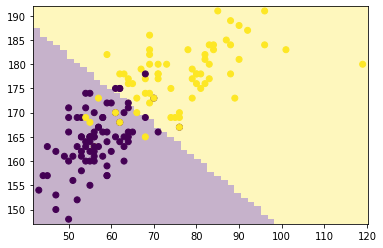

In [67]:
plt.pcolormesh(xx1,xx2, y_pred.reshape(xx1.shape), alpha=0.3, shading='auto')
plt.scatter(x_train['weight'], x_train['height'], c = y_train)
plt.show()


Сделайте аналогичный график на тестовой выборке

In [68]:
x1_min, x1_max = x_test['weight'].min()-0.5, x_test['weight'].max()+0.5
x2_min, x2_max = x_test['height'].min()-0.5, x_test['height'].max()+0.5
xx1,xx2 = np.mgrid[x1_min:x1_max:50j, x2_min:x2_max:50j]
X_pred = np.column_stack([xx2.reshape(-1),xx1.reshape(-1) ])
y_pred = log_reg.predict(X_pred)

C:\ProgramData\Anaconda3\envs\ML\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


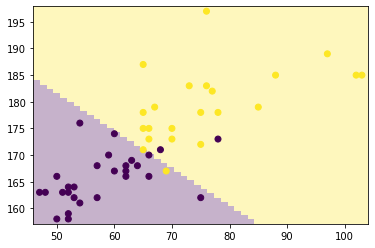

In [69]:
plt.pcolormesh(xx1,xx2, y_pred.reshape(xx1.shape), alpha=0.3, shading='auto')
plt.scatter(x_test['weight'], x_test['height'], c = y_test)
plt.show()